In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df_assignments = pd.read_csv('../XPlanningEvaluation/resources/mobilerobot/study/mturk/assignments/assignments_control_pilot.csv')
df_answers = pd.read_csv('../XPlanningEvaluation/resources/mobilerobot/study/mturk/assignments/answerKey.csv')

In [116]:
df_assignments.head()

,HIT ID,HITType ID,Assignment ID,Worker ID,Total Time (seconds),question0-ref,question0-total-cost,question0-answer,question0-confidence,question0-elapsedTime,...,question2-ref,question2-total-cost,question2-answer,question2-confidence,question2-elapsedTime,question3-ref,question3-total-cost,question3-answer,question3-confidence,question3-elapsedTime
0,3H6W48L9F6OEFV7M7ZQ6UCDIJPTPWC,3PCDMC3F670H2FKP9YGXKYCMV2F2XT,37Q970SNZH7LE655SUAHKBOO7Z7S11,A2TBXASXZIRNNW,1401,question-mission59-agent4,313,yes,fairly,22331,...,question-mission42-agent7,673,no,fairly,18450,question-mission66-agent0,676,yes,fairly,27725
1,3SU800BH88RMN3JWCCQUCTIV354UQ9,3PCDMC3F670H2FKP9YGXKYCMV2F2XT,33M4IA01QJ0H3SQLKYVJPANTQC3RX4,A2TBXASXZIRNNW,937,question-mission45-agent7,224,yes,fairly,30361,...,question-mission69-agent0,187,no,somewhat,34956,question-mission5-agent0,173,yes,fairly,31508
2,3U18MJKL1WL5YCP4ATDDET1KRUANC5,3PCDMC3F670H2FKP9YGXKYCMV2F2XT,3SNVL38CI7R7DQ2V3IQZALG5U2LKC2,A2TBXASXZIRNNW,711,question-mission25-agent2,143,yes,fairly,40740,...,question-mission52-agent7,181,yes,somewhat,18559,question-mission11-agent0,173,yes,somewhat,26885
3,3NOEP8XAU61T4VCCH4MSWVRPSRZPX5,3PCDMC3F670H2FKP9YGXKYCMV2F2XT,3I2PTA7R3WTB7RCE80RUUQ5MYHMKQ7,A2TBXASXZIRNNW,1693,question-mission56-agent0,206,yes,fairly,18042,...,question-mission79-agent0,252,yes,somewhat,20281,question-mission8-agent0,209,yes,fairly,22578
4,3TFJJUELSJO99Q0BOAFTM5YMGZK2CU,3PCDMC3F670H2FKP9YGXKYCMV2F2XT,3X66WABAJZHEY4ATKYUJJQKIH8RG3X,A2TBXASXZIRNNW,820,question-mission34-agent1,198,yes,fairly,51333,...,question-mission14-agent0,154,yes,fairly,22397,question-mission48-agent6,163,no,somewhat,24789


In [7]:
df_answers.head()

,ref,total-cost,answer
0,question-mission59-agent4,708,no
1,question-mission80-agent0,108,yes
2,question-mission42-agent7,709,no
3,question-mission66-agent0,875,yes
4,question-mission45-agent7,220,no


In [10]:
df_answers[df_answers.ref == 'question-mission59-agent4'].head()

,ref,total-cost,answer
0,question-mission59-agent4,708,no


In [33]:
df_answers.ref == 'question-mission59-agent4'

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
      ...  
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
60    False
61    False
62    False
63    False
Name: ref, dtype: bool

In [76]:
def create_columns(data_types, num_questions):
    columns = ['Assignment ID']
    for i in range(num_questions):
        for data_type in data_types:
            columns.append('question' + str(i) + "-" + data_type)
    return columns

In [106]:
def create_data_type_columns(data_type, num_questions):
    return ['question' + str(i) + '-' + data_type for i in range(num_questions)]

In [79]:
def create_dictionary():
    return 0

In [129]:
accuracy_columns = create_columns(['ref', 'total-cost', 'answer'], 4)
df_accuracy = pd.DataFrame(columns=accuracy_columns)

for index, row in df_assignments.iterrows():
    ref_columns = create_data_type_columns('ref', 4)
    df_answer_key = df_answers[df_answers.ref.isin(row[ref_columns])]

    total_cost_columns = create_data_type_columns('total-cost', 4)
    answer_columns = create_data_type_columns('answer', 4)
    worker_acc_dict = {'Assignment ID': row['Assignment ID']}
    for i in range(4):
        ref_column = ref_columns[i] # question[i]-ref
        total_cost_column = total_cost_columns[i] # question[i]-total-cost
        answer_column = answer_columns[i] # question[i]-answer
        
        worker_total_cost = row[total_cost_column]
        correct_total_cost = df_answer_key[df_answer_key.ref == row[ref_column]].iloc[0]['total-cost']
        total_cost_err = abs((correct_total_cost - worker_total_cost) / correct_total_cost)
        
        worker_answer = row[answer_column]
        correct_answer = df_answer_key[df_answer_key.ref == row[ref_column]].iloc[0]['answer']
        answer_acc = worker_answer == correct_answer
        
        worker_acc_dict[ref_column] = row[ref_column]
        worker_acc_dict[total_cost_column] = total_cost_err
        worker_acc_dict[answer_column] = answer_acc
        
        #print(worker_acc_dict)
    #break
    
    answer_value = row['question0-total-cost']
    expected_value = df_answer_key.iloc[0]['total-cost']
    total_cost_diff = abs((expected_value - answer_value) / expected_value)
    correct = row['question0-answer'] == df_answer_key.iloc[0]['answer']
    dic = {'Assignment ID': row['Assignment ID'], 
           'question0-ref': row['question0-ref'], 
           'question0-total-cost difference': total_cost_diff, 
           'question0-answer correct?': correct}
    df_accuracy = df_accuracy.append(worker_acc_dict, ignore_index=True)
print(df_accuracy.head(16))

                     Assignment ID              question0-ref  \
0   37Q970SNZH7LE655SUAHKBOO7Z7S11  question-mission59-agent4   
1   33M4IA01QJ0H3SQLKYVJPANTQC3RX4  question-mission45-agent7   
2   3SNVL38CI7R7DQ2V3IQZALG5U2LKC2  question-mission25-agent2   
3   3I2PTA7R3WTB7RCE80RUUQ5MYHMKQ7  question-mission56-agent0   
4   3X66WABAJZHEY4ATKYUJJQKIH8RG3X  question-mission34-agent1   
5   3OS46CRSLIYWDKN6SVR3QUZCEEHV67  question-mission12-agent0   
6   3COPXFW7XEBQ7FBZ8NC5ULFCTL0KPG  question-mission78-agent2   
7   3MX2NQ3YCCTSY5SNNRIGM9IXYUEX5W  question-mission67-agent2   
8   3Z9WI9EOZ2NYUYDBPA40LCDL7UQHK8  question-mission58-agent4   
9   3AMW0RGHOG1RFLW2504LMDWGNG5PNQ  question-mission9-agent1    
10  3OSWBBLG1HWN2I7G2X0ZKL6PBBCXD4  question-mission68-agent0   
11  3EKVH9QME13M124JE8F6UVCTY2BD29  question-mission46-agent7   
12  3DBQWDE4Y9XNMBEJLLV7O7RZWG4N52  question-mission35-agent0   
13  3N1FSUEFL8ZW4GJ6IMYUNA9RIG7D45  question-mission57-agent0   
14  3S06PH7KSU3FCHMNV4FSP

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


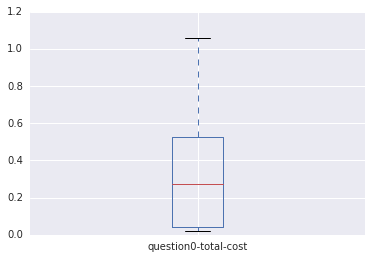

In [130]:
plot = df_accuracy.boxplot(column=['question0-total-cost'])

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


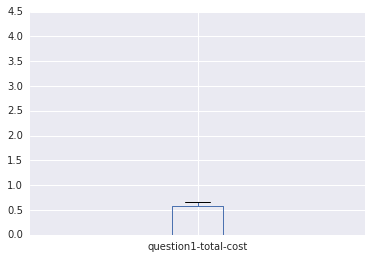

In [131]:
plot = df_accuracy.boxplot(column=['question1-total-cost'])

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


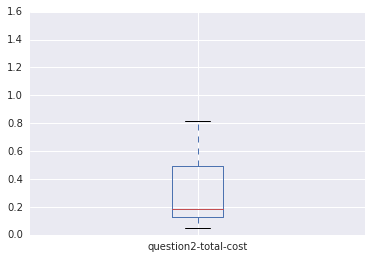

In [132]:
plot = df_accuracy.boxplot(column=['question2-total-cost'])

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


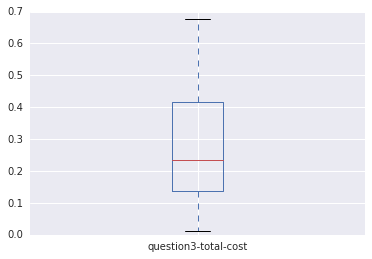

In [133]:
plot = df_accuracy.boxplot(column=['question3-total-cost'])

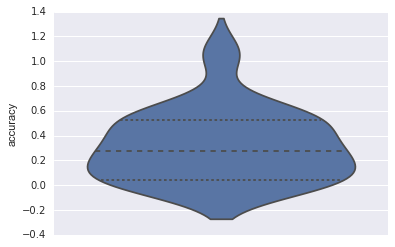

In [136]:
fig, axes = plt.subplots()
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance

sns.violinplot(y=df_accuracy['question0-total-cost'], bw=0.5, inner="quartile")
axes.set_ylabel('accuracy')